In [1]:
# made up example with teacher being sad
# ('T'raurig) or happy ('F'roehlich) on
# consecutive days with observations made
# on their color of shirt worn on the respective 
# days.

#       T          T           T
ttt = 0.4 * 0.3 * 0.5 * 0.6 * 0.5 * 0.1
print('ttt: ', ttt)

#      T          T           F
ttf = 0.4 * 0.3 * 0.5 * 0.6 * 0.5 * 0.3
print('ttf: ', ttf)

#      T          F           T
tft = 0.4 * 0.3 * 0.5 * 0.0 * 0.3 * 0.1
print('tft: ', tft)

#      T          F           F
tff = 0.4 * 0.3 * 0.5 * 0.0 * 0.7 * 0.3
print('tff: ', tff)

#      F          T           T
ftt = 0.6 * 0.7 * 0.3 * 0.6 * 0.5 * 0.1
print('ftt: ', ftt)

#      F          T           F
ftf = 0.6 * 0.7 * 0.3 * 0.6 * 0.5 * 0.3
print('ftf: ', ftf)

#      F          F           T
fft = 0.6 * 0.7 * 0.7 * 0.0 * 0.3 * 0.1
print('fft: ', fft)

#      F          F           F
fff = 0.6 * 0.7 * 0.7 * 0.0 * 0.7 * 0.3
print('fff: ', fff)

ttt:  0.0018
ttf:  0.005399999999999999
tft:  0.0
tff:  0.0
ftt:  0.0037800000000000004
ftf:  0.01134
fft:  0.0
fff:  0.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
from IPython.display import Audio

In [3]:
x, sr = lr.load('beatles.wav')

Audio(x, rate=sr)

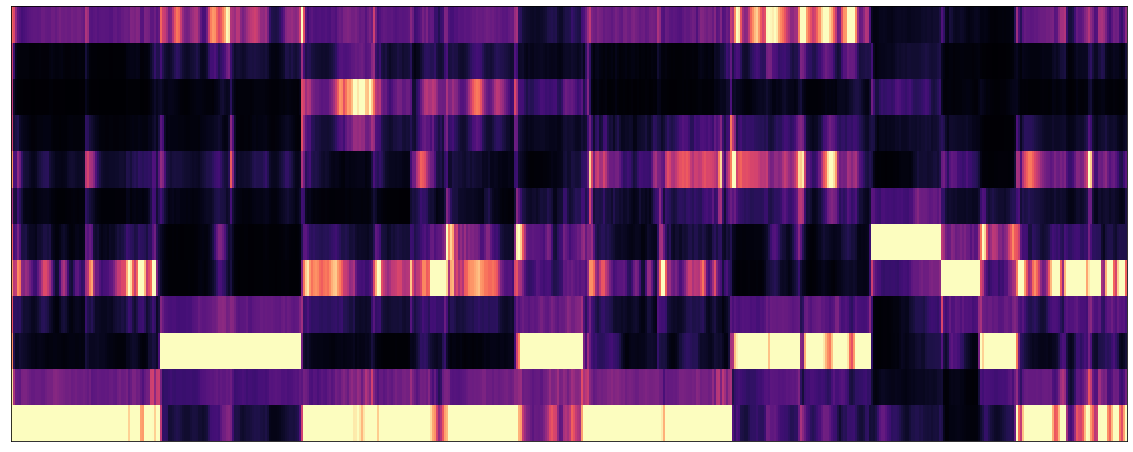

In [4]:
chroma = lr.feature.chroma_stft(y=x)

plt.figure(figsize=(20, 8))
lr.display.specshow(chroma)
plt.show()

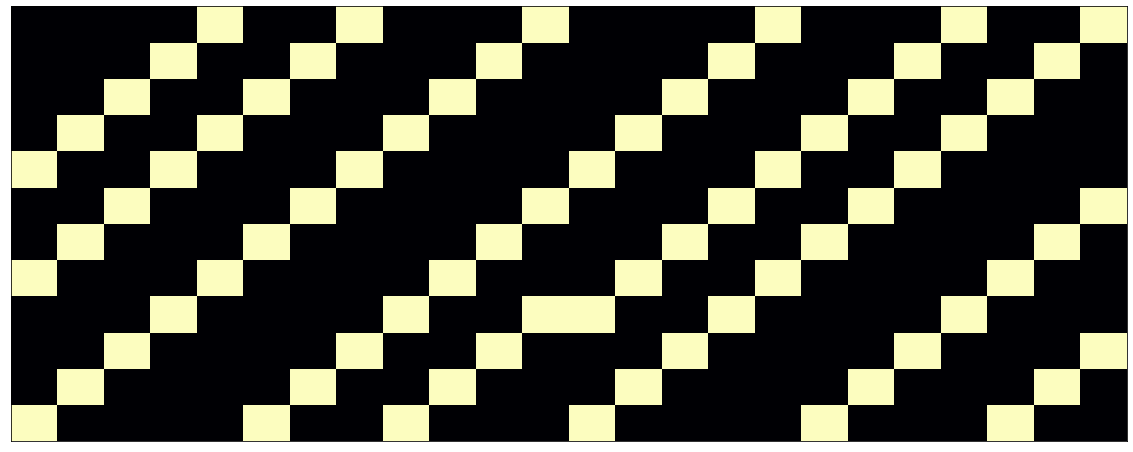

In [5]:
cmaj_temp = np.array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])
cmin_temp = np.array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

templates = np.zeros([12, 24])

for shift in range(12):
    templates[:, shift] = np.roll(cmaj_temp, shift)
    templates[:, shift + 12] = np.roll(cmin_temp, shift)

plt.figure(figsize=(20, 8))
lr.display.specshow(templates)
plt.show()

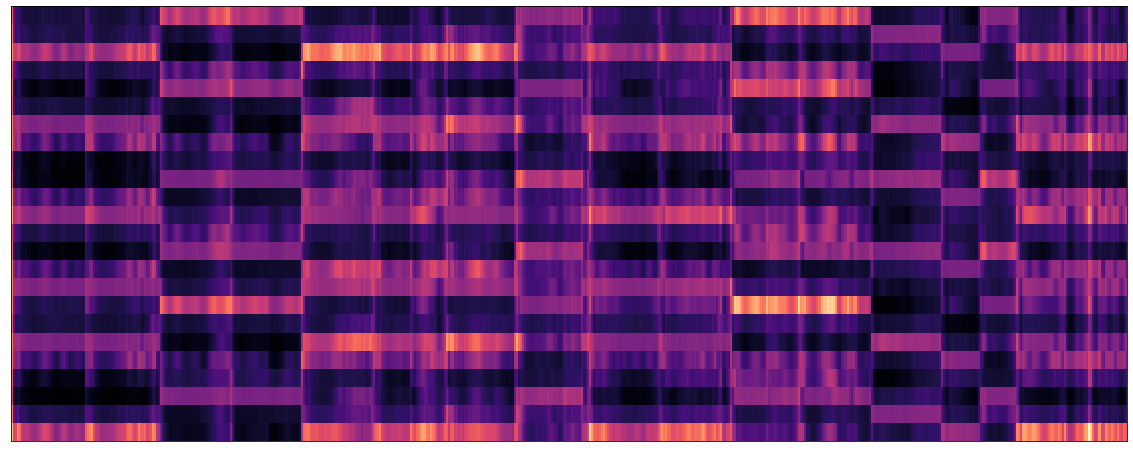

In [6]:
chord_sim = np.matmul(templates.T, chroma)

plt.figure(figsize=(20, 8))
lr.display.specshow(chord_sim)
plt.show()

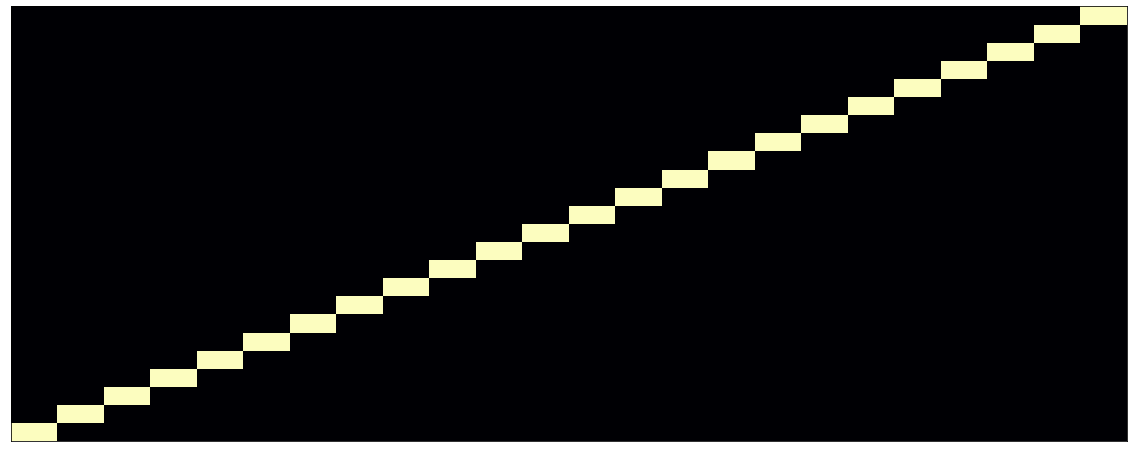

In [7]:
# A (transition probability matrix)

p = 0.15
N = 24
off_diag_entries = (1 - p) / (N - 1)
A = off_diag_entries * np.ones([N, N])
np.fill_diagonal(A, p)

plt.figure(figsize=(20, 8))
lr.display.specshow(A)
plt.show()

In [8]:
# C start probabilities

C = 1 / 24 * np.ones((1, 24))

C

array([[0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.04166667, 0.04166667]])

In [9]:
# B (emission probability matrix)

B_O = chord_sim

In [10]:
def viterbi(A, C, B_O):

    I = A.shape[0]    # Number of states
    N = B_O.shape[1]  # Length of observation sequence

    # Initialize D and E matrices
    D = np.zeros((I, N))
    E = np.zeros((I, N-1)).astype(np.int32)
    D[:, 0] = np.multiply(C, B_O[:, 0])

    # Compute D and E in a nested loop
    for n in range(1, N):
        for i in range(I):
            temp_product = np.multiply(A[:, i], D[:, n-1])
            D[i, n] = np.max(temp_product) * B_O[i, n]
            E[i, n-1] = np.argmax(temp_product)

    # Backtracking
    S_opt = np.zeros(N).astype(np.int32)
    S_opt[-1] = np.argmax(D[:, -1])
    for n in range(N-2, -1, -1):
        S_opt[n] = E[int(S_opt[n+1]), n]

    # Matrix representation of result
    S_mat = np.zeros((I, N)).astype(np.int32)
    for n in range(N):
        S_mat[S_opt[n], n] = 1

    return S_mat

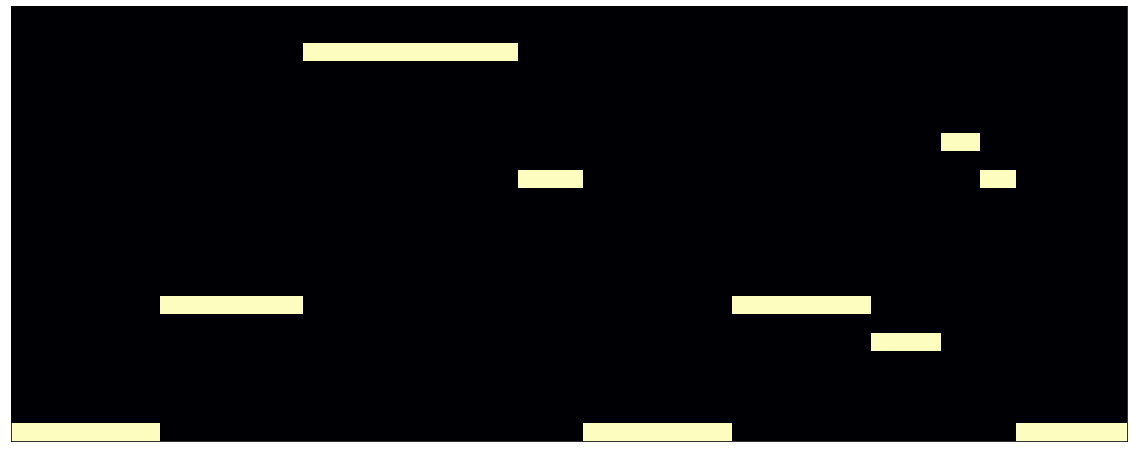

In [11]:
chord_HMM = viterbi(A, C, B_O)

plt.figure(figsize=(20, 8))
lr.display.specshow(chord_HMM)
plt.show()